# Imports y configuraciones iniciales

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from bwb.distributions import DistributionDraw, DistributionDrawBuilder
from bwb.utils import plot_list_of_draws, plot_histogram_from_points

Importamos los datos utilizando el archivo npy que proporciona Google Cloud.

In [2]:
data = np.load(r"..\data\face.npy")
data.shape

(161666, 784)

Hacemos una lista de caritas, fijando un generador con la semilla 42 para tener resultados replicables.

In [3]:
rng = np.random.default_rng(42)
faces: list[DistributionDraw] = list()
n_faces = len(data)

# Builder con la semilla por default
dist_draw_builder = DistributionDrawBuilder(seed=rng)

for i in range(n_faces):
    arr = 255 - data[i, :].reshape(28, 28)
    dd_arr = dist_draw_builder.create_fromarray(arr)
    faces.append(dd_arr)

Observamos las distintas caritas que tiene el dataset.

In [4]:
plot_list_of_draws(faces)

Muestrear con respecto a una carita (la primera para simplificar) para obtener $D = \{x_i\}_{i=1}^{n}\subseteq\mathcal{X}^n$

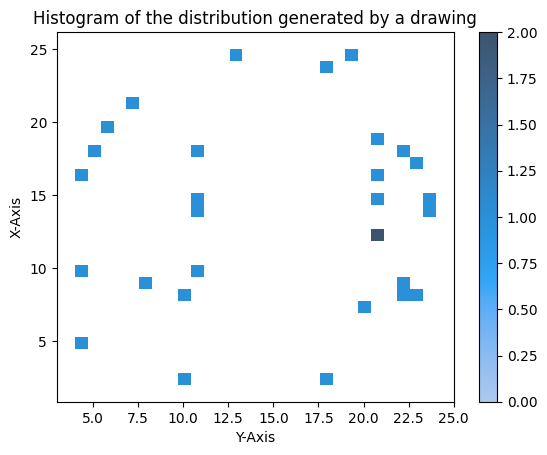

In [5]:
n = 30

first_face = DistributionDraw.fromarray(255 - data[0, :].reshape(28, 28),
                                        seed=42)

x = first_face.rvs(size=n)

plot_histogram_from_points(x, histplot_kwargs=dict(bins=28))
plt.show()

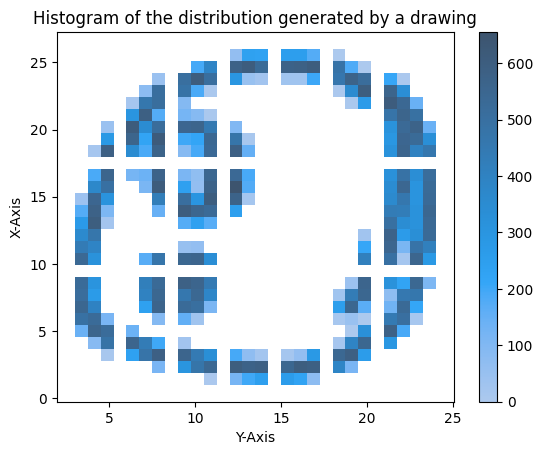

In [6]:
plot_histogram_from_points(first_face.rvs(size=100_000), histplot_kwargs=dict(bins=28))
plt.show()

Defino
\begin{equation}
\tilde\Lambda_n(m) = \prod_{i=1}^{n} f_m(x_i)
\end{equation}

A través de la función `likelihood`

In [7]:
def likelihood(mu: DistributionDraw, data: list[tuple[int, int]]):
    evaluations = []
    for i in range(len(data)):
        evaluations.append(mu.matrix[data[i]])
    return np.prod(evaluations)

likelihood(mu=faces[0], data=x)

9.074242862561625e-72

# Metropolis Algorithm

En esta sección se implementa el *Metropolis Algorithm*. Este posee la siguiente matriz $R$:
\begin{equation}
R_{\mu, \nu} = (\text{degr}(\mu))^{-1} = \frac{1}{|\mathcal{M} - 1|}
\end{equation}
donde lo último es por la forma que posee el grafo escogido.

In [8]:
%%time
# Calcular las distintas verosmilitudes como caché
likelihood_cache = np.array([likelihood(face, data=x) for face in faces])

probabilities = (likelihood_cache > 0).astype(float)
probabilities /= probabilities.sum()

CPU times: total: 12 s
Wall time: 12.2 s


In [9]:
%%time

N = 1_000  # 10_000
mu = []

# Paso 1. Empezar con una distribución inicial mu^(0) \in M
current_face = int(rng.choice(n_faces, p=probabilities))
mu.append(faces[current_face])  # mu^(0)
visited_faces = [faces[current_face]]

# Paso 2.
for i in range(N):
    print("=" * 10)

    # Paso a. muestrear u ~ U[0, 1]
    u = rng.uniform(low=0, high=1)

    # Paso b. muestrear mu^star de acuerdo a R partiendo desde mu^(i)
    possible_faces = list(range(n_faces))
    possible_faces.remove(current_face)
    # Escoger una carita
    next_face = int(rng.choice(possible_faces))
    mu_star = faces[next_face]
    if next_face not in likelihood_cache: likelihood_cache[next_face] = likelihood(mu_star, data=x)

    # Paso c.
    # Luego calculamos la probabilidad de aceptación
    A_mu_i_mu_star = min(1., (likelihood_cache[next_face])
                         / (likelihood_cache[current_face])
                         )

    print(f"{i = }")
    print(f"{likelihood_cache[current_face] = }")
    print(f"{A_mu_i_mu_star = }")
    if u < A_mu_i_mu_star:
        print(f"{current_face = } -> {next_face = }")
        print(f"{u = }")

        mu.append(mu_star)
        # Moverse a la siguiente carita
        current_face = next_face
        visited_faces.append(mu_star)

    else:
        mu.append(mu[i])


i = 0
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0
i = 1
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0
i = 2
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0
i = 3
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0
i = 4
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0
i = 5
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0
i = 6
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0
i = 7
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0
i = 8
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0
i = 9
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0
i = 10
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0
i = 11
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0
i = 12
likelih

i = 92
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0
i = 93
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0
i = 94
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0
i = 95
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0
i = 96
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0
i = 97
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0
i = 98
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0
i = 99
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0
i = 100
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0
i = 101
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0
i = 102
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0
i = 103
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0


i = 179
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0
i = 180
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0
i = 181
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0
i = 182
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0
i = 183
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0
i = 184
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0
i = 185
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0
i = 186
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0
i = 187
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0
i = 188
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0
i = 189
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0
i = 190
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_sta

i = 272
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0
i = 273
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0
i = 274
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0
i = 275
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0
i = 276
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0
i = 277
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0
i = 278
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0
i = 279
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0
i = 280
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0
i = 281
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0
i = 282
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0
i = 283
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_sta

i = 365
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0
i = 366
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0
i = 367
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0
i = 368
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0
i = 369
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0
i = 370
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0
i = 371
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0
i = 372
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0
i = 373
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0
i = 374
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0
i = 375
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0
i = 376
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_sta

i = 465
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0
i = 466
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0
i = 467
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0
i = 468
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0
i = 469
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0
i = 470
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0
i = 471
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0
i = 472
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0
i = 473
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0
i = 474
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0
i = 475
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0
i = 476
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_sta

i = 567
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0
i = 568
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0
i = 569
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0
i = 570
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0
i = 571
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0
i = 572
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0
i = 573
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0
i = 574
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0
i = 575
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0
i = 576
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0
i = 577
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0
i = 578
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_sta

i = 665
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0
i = 666
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0
i = 667
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0
i = 668
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0
i = 669
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0
i = 670
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0
i = 671
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0
i = 672
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0
i = 673
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0
i = 674
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0
i = 675
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0
i = 676
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_sta

i = 762
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0
i = 763
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0
i = 764
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0
i = 765
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0
i = 766
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0
i = 767
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0
i = 768
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0
i = 769
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0
i = 770
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0
i = 771
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0
i = 772
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0
i = 773
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_sta

i = 862
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0
i = 863
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0
i = 864
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0
i = 865
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0
i = 866
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0
i = 867
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0
i = 868
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0
i = 869
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0
i = 870
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0
i = 871
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0
i = 872
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0
i = 873
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_sta

i = 966
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0
i = 967
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0
i = 968
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0
i = 969
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0
i = 970
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0
i = 971
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0
i = 972
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0
i = 973
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0
i = 974
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0
i = 975
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0
i = 976
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_star = 0.0
i = 977
likelihood_cache[current_face] = 3.126520320908074e-76
A_mu_i_mu_sta

In [10]:
len(visited_faces)

1

Empecemos observando las distintas imágenes que generó

In [11]:
# Primera imagen generada
mu[0]

In [12]:
plot_list_of_draws(visited_faces)

In [13]:
# Última imagen generada
mu[-1]

# Gibbs Sampler

Ahora empecemos a generar la otra variación del algoritmo: *Gibbs Sampler*. Después de unos cálculos, este posee la siguiente matriz $R$:
\begin{equation}
R_{\mu, \nu} = \frac{
\tilde \Lambda_n(\nu)
}{
\sum_{\tilde \nu \in \mathcal{M}} \tilde \Lambda_n(\tilde \nu) - \tilde \Lambda_n(\mu)
}
\end{equation}
con la función $\tilde\Lambda_n$ definida como antes.

Notemos que, la gran diferencia con el otro algoritmo es la forma de calcular la matriz $R$. Por este motivo se copiará y pegará el algoritmo anterior, modificando este valor.

In [14]:
%%time
# Calcular las distintas verosmilitudes como caché
likelihood_cache = np.array([likelihood(nu_tilde, data=x) for nu_tilde in faces])

# Cálculo de la sumatoria, que es un valor genérico para todos
sum_lambdas_n = sum(likelihood_cache)
sum_lambdas_n

CPU times: total: 3.44 s
Wall time: 3.43 s


9.074562456270114e-72

In [15]:
sum(likelihood_cache > 0)

9

In [16]:
%%time

N = 1_000
mu = []
possible_faces = list(range(n_faces))

# Paso 1. Empezar con una distribución inicial mu^(0) \in M
current_face = int(rng.choice(n_faces))
mu.append(faces[current_face])  # mu^(0)
probabilities = dict()

# Paso 2.
for i in range(N):
    print("=" * 10)
    # Paso a. muestrear u ~ U[0, 1]
    u = rng.uniform(low=0, high=1)

    # Paso b. muestrear mu^star de acuerdo a R partiendo desde mu^(i)
    # Calcular las probabilidades
    if current_face not in probabilities:
        print(f"Calculando las probabilidades de transición de la carita {current_face = }")
        probabilities[current_face] = np.array([
            likelihood_cache[face_i]
            / (sum_lambdas_n - likelihood_cache[current_face]) for face_i in possible_faces
        ])
        probabilities[current_face][current_face] = 0.
    # Escoger una carita
    next_face = int(rng.choice(possible_faces, p=probabilities[current_face]))
    mu_star = faces[next_face]

    # Paso c.
    # calculamos la probabilidad de aceptación
    A_mu_i_mu_star = min(1., (sum_lambdas_n - likelihood_cache[current_face])
                         / (sum_lambdas_n - likelihood_cache[next_face])
                         )

    print(f"{i = }")
    print(f"{A_mu_i_mu_star = }")
    if u < A_mu_i_mu_star:
        print(f"{current_face = } -> {next_face = }")
        print(f"{u = }")

        mu.append(mu_star)
        # Moverse a la siguiente carita
        current_face = next_face

    else:
        mu.append(mu[i])


Calculando las probabilidades de transición de la carita current_face = 150338
i = 0
A_mu_i_mu_star = 1.0
current_face = 150338 -> next_face = 0
u = 0.3709123215416692
Calculando las probabilidades de transición de la carita current_face = 0
i = 1
A_mu_i_mu_star = 3.5219849065630436e-05
i = 2
A_mu_i_mu_star = 3.5219849065630436e-05
i = 3
A_mu_i_mu_star = 3.5219849065630436e-05
i = 4
A_mu_i_mu_star = 3.5219849065630436e-05
i = 5
A_mu_i_mu_star = 3.5219849065630436e-05
i = 6
A_mu_i_mu_star = 3.5219849065630436e-05
i = 7
A_mu_i_mu_star = 3.5219849065630436e-05
i = 8
A_mu_i_mu_star = 3.5219849065630436e-05
i = 9
A_mu_i_mu_star = 3.5219849065630436e-05
i = 10
A_mu_i_mu_star = 3.5219849065630436e-05
i = 11
A_mu_i_mu_star = 3.5219849065630436e-05
i = 12
A_mu_i_mu_star = 3.5219849065630436e-05
i = 13
A_mu_i_mu_star = 3.5219849065630436e-05
i = 14
A_mu_i_mu_star = 3.5219849065630436e-05
i = 15
A_mu_i_mu_star = 3.5219849065630436e-05
i = 16
A_mu_i_mu_star = 3.5219849065630436e-05
i = 17
A_mu_i_m

i = 140
A_mu_i_mu_star = 3.5219849065630436e-05
i = 141
A_mu_i_mu_star = 3.5219849065630436e-05
i = 142
A_mu_i_mu_star = 3.5219849065630436e-05
i = 143
A_mu_i_mu_star = 3.5219849065630436e-05
i = 144
A_mu_i_mu_star = 3.5219849065630436e-05
i = 145
A_mu_i_mu_star = 3.5219849065630436e-05
i = 146
A_mu_i_mu_star = 3.5219849065630436e-05
i = 147
A_mu_i_mu_star = 3.5219849065630436e-05
i = 148
A_mu_i_mu_star = 3.5219849065630436e-05
i = 149
A_mu_i_mu_star = 3.5219849065630436e-05
i = 150
A_mu_i_mu_star = 3.5219849065630436e-05
i = 151
A_mu_i_mu_star = 3.5219849065630436e-05
i = 152
A_mu_i_mu_star = 3.5219849065630436e-05
i = 153
A_mu_i_mu_star = 3.5219849065630436e-05
i = 154
A_mu_i_mu_star = 3.5219849065630436e-05
i = 155
A_mu_i_mu_star = 3.5219849065630436e-05
i = 156
A_mu_i_mu_star = 3.5219849065630436e-05
i = 157
A_mu_i_mu_star = 3.5219849065630436e-05
i = 158
A_mu_i_mu_star = 3.5219849065630436e-05
i = 159
A_mu_i_mu_star = 3.5219849065630436e-05
i = 160
A_mu_i_mu_star = 3.5219849065630

i = 280
A_mu_i_mu_star = 3.5219849065630436e-05
i = 281
A_mu_i_mu_star = 3.5219849065630436e-05
i = 282
A_mu_i_mu_star = 3.5219849065630436e-05
i = 283
A_mu_i_mu_star = 3.5219849065630436e-05
i = 284
A_mu_i_mu_star = 3.5219849065630436e-05
i = 285
A_mu_i_mu_star = 3.5219849065630436e-05
i = 286
A_mu_i_mu_star = 3.5219849065630436e-05
i = 287
A_mu_i_mu_star = 3.5219849065630436e-05
i = 288
A_mu_i_mu_star = 3.5219849065630436e-05
i = 289
A_mu_i_mu_star = 3.5219849065630436e-05
i = 290
A_mu_i_mu_star = 3.5219849065630436e-05
i = 291
A_mu_i_mu_star = 3.5219849065630436e-05
i = 292
A_mu_i_mu_star = 3.5219849065630436e-05
i = 293
A_mu_i_mu_star = 3.5219849065630436e-05
i = 294
A_mu_i_mu_star = 3.5219849065630436e-05
i = 295
A_mu_i_mu_star = 3.5219849065630436e-05
i = 296
A_mu_i_mu_star = 3.5219849065630436e-05
i = 297
A_mu_i_mu_star = 3.5219849065630436e-05
i = 298
A_mu_i_mu_star = 3.5219849065630436e-05
i = 299
A_mu_i_mu_star = 3.5219849065630436e-05
i = 300
A_mu_i_mu_star = 3.5219849065630

i = 422
A_mu_i_mu_star = 3.5219849065630436e-05
i = 423
A_mu_i_mu_star = 3.5219849065630436e-05
i = 424
A_mu_i_mu_star = 3.5219849065630436e-05
i = 425
A_mu_i_mu_star = 3.5219849065630436e-05
i = 426
A_mu_i_mu_star = 3.5219849065630436e-05
i = 427
A_mu_i_mu_star = 3.5219849065630436e-05
i = 428
A_mu_i_mu_star = 3.5219849065630436e-05
i = 429
A_mu_i_mu_star = 3.5219849065630436e-05
i = 430
A_mu_i_mu_star = 3.5219849065630436e-05
i = 431
A_mu_i_mu_star = 3.5219849065630436e-05
i = 432
A_mu_i_mu_star = 3.5219849065630436e-05
i = 433
A_mu_i_mu_star = 3.5219849065630436e-05
i = 434
A_mu_i_mu_star = 3.5219849065630436e-05
i = 435
A_mu_i_mu_star = 3.5219849065630436e-05
i = 436
A_mu_i_mu_star = 3.5219849065630436e-05
i = 437
A_mu_i_mu_star = 3.5219849065630436e-05
i = 438
A_mu_i_mu_star = 3.5219849065630436e-05
i = 439
A_mu_i_mu_star = 3.5219849065630436e-05
i = 440
A_mu_i_mu_star = 3.521866020774197e-05
i = 441
A_mu_i_mu_star = 3.5219849065630436e-05
i = 442
A_mu_i_mu_star = 3.52198490656304

i = 567
A_mu_i_mu_star = 3.5219849065630436e-05
i = 568
A_mu_i_mu_star = 3.5219849065630436e-05
i = 569
A_mu_i_mu_star = 3.5219849065630436e-05
i = 570
A_mu_i_mu_star = 3.5219849065630436e-05
i = 571
A_mu_i_mu_star = 3.5219849065630436e-05
i = 572
A_mu_i_mu_star = 3.5219849065630436e-05
i = 573
A_mu_i_mu_star = 3.5219849065630436e-05
i = 574
A_mu_i_mu_star = 3.5219849065630436e-05
i = 575
A_mu_i_mu_star = 3.5219849065630436e-05
i = 576
A_mu_i_mu_star = 3.5219849065630436e-05
i = 577
A_mu_i_mu_star = 3.5219849065630436e-05
i = 578
A_mu_i_mu_star = 3.5219849065630436e-05
i = 579
A_mu_i_mu_star = 3.5219849065630436e-05
i = 580
A_mu_i_mu_star = 3.5219849065630436e-05
i = 581
A_mu_i_mu_star = 3.5219849065630436e-05
i = 582
A_mu_i_mu_star = 3.5219849065630436e-05
i = 583
A_mu_i_mu_star = 3.5219849065630436e-05
i = 584
A_mu_i_mu_star = 3.5219849065630436e-05
i = 585
A_mu_i_mu_star = 3.5219849065630436e-05
i = 586
A_mu_i_mu_star = 3.5219849065630436e-05
i = 587
A_mu_i_mu_star = 3.5219849065630

i = 729
A_mu_i_mu_star = 3.5219849065630436e-05
i = 730
A_mu_i_mu_star = 3.5219849065630436e-05
i = 731
A_mu_i_mu_star = 3.5219849065630436e-05
i = 732
A_mu_i_mu_star = 3.5219849065630436e-05
i = 733
A_mu_i_mu_star = 3.5219849065630436e-05
i = 734
A_mu_i_mu_star = 3.5219849065630436e-05
i = 735
A_mu_i_mu_star = 3.5219849065630436e-05
i = 736
A_mu_i_mu_star = 3.5219849065630436e-05
i = 737
A_mu_i_mu_star = 3.5219849065630436e-05
i = 738
A_mu_i_mu_star = 3.5219849065630436e-05
i = 739
A_mu_i_mu_star = 3.5219849065630436e-05
i = 740
A_mu_i_mu_star = 3.5219849065630436e-05
i = 741
A_mu_i_mu_star = 3.5219849065630436e-05
i = 742
A_mu_i_mu_star = 3.5219849065630436e-05
i = 743
A_mu_i_mu_star = 3.5219849065630436e-05
i = 744
A_mu_i_mu_star = 3.5219849065630436e-05
i = 745
A_mu_i_mu_star = 3.5219849065630436e-05
i = 746
A_mu_i_mu_star = 3.5219849065630436e-05
i = 747
A_mu_i_mu_star = 3.5219849065630436e-05
i = 748
A_mu_i_mu_star = 3.5219849065630436e-05
i = 749
A_mu_i_mu_star = 3.5219849065630

i = 868
A_mu_i_mu_star = 3.5219849065630436e-05
i = 869
A_mu_i_mu_star = 3.5219849065630436e-05
i = 870
A_mu_i_mu_star = 3.5219849065630436e-05
i = 871
A_mu_i_mu_star = 3.5219849065630436e-05
i = 872
A_mu_i_mu_star = 3.5219849065630436e-05
i = 873
A_mu_i_mu_star = 3.5219849065630436e-05
i = 874
A_mu_i_mu_star = 3.5219849065630436e-05
i = 875
A_mu_i_mu_star = 3.5219849065630436e-05
i = 876
A_mu_i_mu_star = 3.5219849065630436e-05
i = 877
A_mu_i_mu_star = 3.5219849065630436e-05
i = 878
A_mu_i_mu_star = 3.5219849065630436e-05
i = 879
A_mu_i_mu_star = 3.5219849065630436e-05
i = 880
A_mu_i_mu_star = 3.5219849065630436e-05
i = 881
A_mu_i_mu_star = 3.5219849065630436e-05
i = 882
A_mu_i_mu_star = 3.5219849065630436e-05
i = 883
A_mu_i_mu_star = 3.5219849065630436e-05
i = 884
A_mu_i_mu_star = 3.5219849065630436e-05
i = 885
A_mu_i_mu_star = 3.5219849065630436e-05
i = 886
A_mu_i_mu_star = 3.5219849065630436e-05
i = 887
A_mu_i_mu_star = 3.5219849065630436e-05
i = 888
A_mu_i_mu_star = 3.5219849065630

In [17]:
not_none_keys = probabilities.keys()

len(not_none_keys)

2

Empecemos observando las distintas imágenes que generó

In [18]:
# Primera imagen generada
mu[0]

In [19]:
plot_list_of_draws([faces[k] for k in not_none_keys])

In [20]:
# Última imagen generada
mu[-1]

# Ideas y Conclusiones

Ideas para continuar:
* Dejar guardadas de alguna forma las simulaciones realizadas
* Intentar hacer el mismo experimento, pero haciendo que el soporte de las funciones sea distinto de 0 (es decir, que todos tengan el mismo soporte), para que la función $\tilde \Lambda_n$ no se anule, y no posea una probabilidad de aceptación nula

El experimento fue realizado con 161.666 caritas, en donde se muestreó a partir de la primera carita 3 puntos, es decir $D=\{x_i\}_{i=1}^{3} \sim m_0$ i.i.d.

A pesar de los pocos datos que se utilizó para calcular la posterior $\Pi_n$, aún se toma demasiado "saltos" (igual uno esperaría que se pueda probar con $n=100$ datos, por ejemplo). Esto se puede deber por la forma que posee la verosimilitud:
\begin{equation}
\bold{\Pi}_n(x_1,\ldots,x_n | m) = \tilde \Lambda_n(m) = \prod_{i=1}^{n} f_m(x_i).
\end{equation}

Cómo se están evaluando los puntos de los datos en la función de distribución del modelo $m$, entonces, si es que existe un punto $\tilde x \in D$ tal que $f_m(\tilde x) = 0$, hará que el valor de la verosimilitud sea idénticamente 0. De forma que, sin importar los otros valores, si $D \not\subseteq \text{sop}(m)$, entonces el valor asignado al modelo $m$ será de 0.

Es esta la razón por la que el algoritmo MCMC termina saltándose varias distribuciones. Una forma de arreglar esto, es el de asignar algún valor distinto de nulo, para darle mayor oportunidad a saltar a esas distribuciones. Esto es lo que se hará en el notebook siguiente.

Adicionalmente, se observa que el algoritmo de *Gibbs sampler* se demora 30 segundos más que el de *Metropolis algorithm*.